In [1]:
from ultralytics import YOLO, checks, hub
import pandas as pd

In [2]:
checks()

Ultralytics YOLOv8.2.5 🚀 Python-3.11.7 torch-2.2.0+cu121 CUDA:0 (NVIDIA TITAN Xp, 12190MiB)
Setup complete ✅ (16 CPUs, 187.6 GB RAM, 38.5/184.8 GB disk)


In [3]:
from ultralytics import YOLO

# Load a model
#model = YOLO('yolov8n.yaml')  # build a new model from scratch
model = YOLO('yolov8n.pt') 

In [5]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Download the image locally
image_url = 'https://ultralytics.com/images/bus.jpg'
response = requests.get(image_url)
with open('bus.jpg', 'wb') as f:
    f.write(response.content)

In [7]:
# Load a model
model = YOLO('yolov8n.pt') 

In [8]:

def show_image(img, confidence_threshold=0.5):
    
    results = model(img)[0]

    # Get the image and detections
    image = Image.open('bus.jpg')
    confidences = []
    classes = []
    for box in results.boxes:
        box_coords = box.xyxy[0].cpu().numpy()
        confidence = box.conf[0].cpu().numpy()
        confidences.append(confidence.item())
        class_name = model.names[int(box.cls)]
        classes.append(class_name)
        if confidence < confidence_threshold:
            continue
        plt.gca().add_patch(plt.Rectangle((box_coords[0], box_coords[1]), 
                                        box_coords[2]-box_coords[0], 
                                        box_coords[3]-box_coords[1], 
                                        fill=False, edgecolor='r', lw=2))
        # Put label
        
        plt.text(box_coords[0], box_coords[1], class_name, color='r')

    plt.imshow(image, alpha=0.5)
    return pd.Series(confidences, classes, )


image 1/1 /home/nipun.batra/git/blog/posts/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 55.8ms
Speed: 3.2ms preprocess, 55.8ms inference, 1384.5ms postprocess per image at shape (1, 3, 640, 480)


bus          0.870545
person       0.868980
person       0.853604
person       0.819305
stop sign    0.346069
person       0.301294
dtype: float64

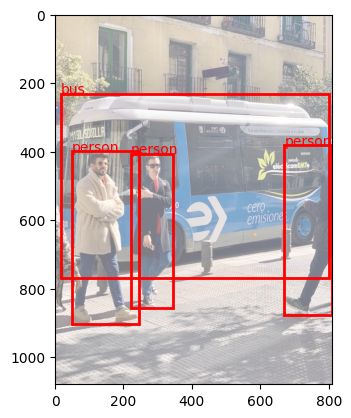

In [9]:
show_image('bus.jpg')

In [11]:
img = Image.open('bus.jpg')
res = model(img)[0]


0: 640x480 4 persons, 1 bus, 1 stop sign, 9.9ms
Speed: 20.6ms preprocess, 9.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


In [20]:
res.boxes[0].prob

AttributeError: 'Boxes' object has no attribute 'prob'. See valid attributes below.

    Manages detection boxes, providing easy access and manipulation of box coordinates, confidence scores, class
    identifiers, and optional tracking IDs. Supports multiple formats for box coordinates, including both absolute and
    normalized forms.

    Attributes:
        data (torch.Tensor): The raw tensor containing detection boxes and their associated data.
        orig_shape (tuple): The original image size as a tuple (height, width), used for normalization.
        is_track (bool): Indicates whether tracking IDs are included in the box data.

    Properties:
        xyxy (torch.Tensor | numpy.ndarray): Boxes in [x1, y1, x2, y2] format.
        conf (torch.Tensor | numpy.ndarray): Confidence scores for each box.
        cls (torch.Tensor | numpy.ndarray): Class labels for each box.
        id (torch.Tensor | numpy.ndarray, optional): Tracking IDs for each box, if available.
        xywh (torch.Tensor | numpy.ndarray): Boxes in [x, y, width, height] format, calculated on demand.
        xyxyn (torch.Tensor | numpy.ndarray): Normalized [x1, y1, x2, y2] boxes, relative to `orig_shape`.
        xywhn (torch.Tensor | numpy.ndarray): Normalized [x, y, width, height] boxes, relative to `orig_shape`.

    Methods:
        cpu(): Moves the boxes to CPU memory.
        numpy(): Converts the boxes to a numpy array format.
        cuda(): Moves the boxes to CUDA (GPU) memory.
        to(device, dtype=None): Moves the boxes to the specified device.
    

In [22]:
# Access the detection results
results = model(img)

boxes = results[0].boxes

# Print class probabilities for each detected object
for box in boxes:
    class_probs = box.probs
    print(f"Bounding Box: {box.xyxy}")
    for class_id, prob in enumerate(class_probs):
        print(f"Class ID: {class_id}, Probability: {prob:.4f}")


0: 640x480 4 persons, 1 bus, 1 stop sign, 8.5ms
Speed: 23.1ms preprocess, 8.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


AttributeError: 'Boxes' object has no attribute 'probs'. See valid attributes below.

    Manages detection boxes, providing easy access and manipulation of box coordinates, confidence scores, class
    identifiers, and optional tracking IDs. Supports multiple formats for box coordinates, including both absolute and
    normalized forms.

    Attributes:
        data (torch.Tensor): The raw tensor containing detection boxes and their associated data.
        orig_shape (tuple): The original image size as a tuple (height, width), used for normalization.
        is_track (bool): Indicates whether tracking IDs are included in the box data.

    Properties:
        xyxy (torch.Tensor | numpy.ndarray): Boxes in [x1, y1, x2, y2] format.
        conf (torch.Tensor | numpy.ndarray): Confidence scores for each box.
        cls (torch.Tensor | numpy.ndarray): Class labels for each box.
        id (torch.Tensor | numpy.ndarray, optional): Tracking IDs for each box, if available.
        xywh (torch.Tensor | numpy.ndarray): Boxes in [x, y, width, height] format, calculated on demand.
        xyxyn (torch.Tensor | numpy.ndarray): Normalized [x1, y1, x2, y2] boxes, relative to `orig_shape`.
        xywhn (torch.Tensor | numpy.ndarray): Normalized [x, y, width, height] boxes, relative to `orig_shape`.

    Methods:
        cpu(): Moves the boxes to CPU memory.
        numpy(): Converts the boxes to a numpy array format.
        cuda(): Moves the boxes to CUDA (GPU) memory.
        to(device, dtype=None): Moves the boxes to the specified device.
    

In [26]:
results[0].boxes[0].data

tensor([[ 17.2858, 230.5922, 801.5182, 768.4058,   0.8705,   5.0000]], device='cuda:0')

In [27]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
   


image 1/1 /home/nipun.batra/git/blog/posts/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 6.9ms
Speed: 2.5ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Processed 4 boxes
The first one is {'bbox': [17.28582763671875, 230.59222412109375, 801.5181884765625, 768.4058227539062], 'bbox_xywh': [409.4020080566406, 499.4990234375, 784.2323608398438, 537.8135986328125], 'best_conf': 0.8705450892448425, 'best_cls': 5.0, 'image_id': 'bus.jpg', 'activations': [1.0311242476745974e-05, 9.112093721341807e-06, 0.0003611394204199314, 6.673172902083024e-05, 0.00022987156989984214, 0.8705450892448425, 0.0009488395880907774, 0.007086973637342453, 0.0001582797704031691, 9.052685527422e-06, 4.503397406097065e-07, 1.0215371730737388e-05, 1.730335316096898e-05, 4.165742666373262e-06, 5.312303414939379e-07, 1.9164923514836119e-07, 9.471239650338248e-07, 4.973830982635263e-06, 2.5008853654640006e-08, 4.033859681840113e-07, 0.0005047211889177561, 6.792038220737595e-07, 4.

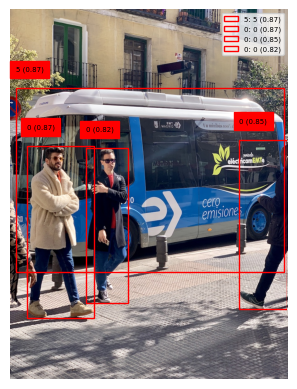

In [35]:
import numpy as np
import os
import torch

from ultralytics import YOLO
from ultralytics.nn.modules.head import Detect
from ultralytics.utils import ops

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
from PIL import Image

import json

class SaveIO:
    """Simple PyTorch hook to save the output of a nn.module."""
    def __init__(self):
        self.input = None
        self.output = None
        
    def __call__(self, module, module_in, module_out):
        self.input = module_in
        self.output = module_out

def load_and_prepare_model(model_path):
    # we are going to register a PyTorch hook on the important parts of the YOLO model,
    # then reverse engineer the outputs to get boxes and logits
    # first, we have to register the hooks to the model *before running inference*
    # then, when inference is run, the hooks will save the inputs/outputs of their respective modules
    model = YOLO(model_path)
    detect = None
    cv2_hooks = None
    cv3_hooks = None
    detect_hook = SaveIO()
    for i, module in enumerate(model.model.modules()):
        if type(module) is Detect:
            module.register_forward_hook(detect_hook)
            detect = module

            cv2_hooks = [SaveIO() for _ in range(module.nl)]
            cv3_hooks = [SaveIO() for _ in range(module.nl)]
            for i in range(module.nl):
                module.cv2[i].register_forward_hook(cv2_hooks[i])
                module.cv3[i].register_forward_hook(cv3_hooks[i])
            break
    input_hook = SaveIO()
    model.model.register_forward_hook(input_hook)

    # save and return these for later
    hooks = [input_hook, detect, detect_hook, cv2_hooks, cv3_hooks]

    return model, hooks


def is_text_file(file_path):
    # Check if the file extension indicates a text file
    text_extensions = ['.txt'] #, '.csv', '.json', '.xml']  # Add more extensions if needed
    return any(file_path.lower().endswith(ext) for ext in text_extensions)

def is_image_file(file_path):
    # Check if the file extension indicates an image file
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']  # Add more extensions if needed
    return any(file_path.lower().endswith(ext) for ext in image_extensions)


def plot_image(img_path, results, category_mapping=None, suffix='test', show_labels=True, include_legend=True):
    """
    Display the image with bounding boxes and their corresponding class scores.

    Args:
        img_path (str): Path to the image file.
        results (list): List of dictionaries containing bounding box information.
        category_mapping:
        suffix: what to append to the original image name when saving

    Returns:
        None
    """

    img = Image.open(img_path)
    fig, ax = plt.subplots()
    ax.imshow(img)

    for box in results:
        x0, y0, x1, y1 = map(int, box['bbox'])

        box_color = "r"  # red
        tag_color = "k"  # black
        max_score = max(box['activations'])
        max_category_id = box['activations'].index(max_score)
        category_name = max_category_id

        if category_mapping:
            max_category_name = category_mapping.get(max_category_id, "Unknown")
            category_name = max_category_name

        rect = patches.Rectangle(
            (x0, y0),
            x1 - x0,
            y1 - y0,
            edgecolor=box_color,
            label=f"{max_category_id}: {category_name} ({max_score:.2f})",
            facecolor='none'
        )
        ax.add_patch(rect)

        if show_labels:
            plt.text(
                x0,
                y0 - 50,
                f"{max_category_id} ({max_score:.2f})",
                fontsize="5",
                color=tag_color,
                backgroundcolor=box_color,
            )

    if include_legend:
        ax.legend(fontsize="5")

    plt.axis("off")
    plt.savefig(f'{os.path.basename(img_path).rsplit(".", 1)[0]}_{suffix}.jpg', bbox_inches="tight", dpi=300)


def write_json(results):
    # Create a list to store the predictions data
    predictions = []

    for result in results:
        image_id = os.path.basename(result['image_id'])#.split('.')[0]
        # image_id = result["image_id"]
        #image_id = os.path.basename(img_path).split('.')[0]
        max_category_id = result['activations'].index(max(result['activations']))
        category_id = max_category_id
        bbox = result['bbox']
        score = max(result['activations'])
        activations = result['activations']

        prediction = {
            'image_id': image_id,
            'category_id': category_id,
            'bbox': bbox,
            'score': score,
            'activations': activations
        }

        predictions.append(prediction)

    # Write the predictions list to a JSON file
    with open('predictions.json', 'w') as f:
        json.dump(predictions, f)


def calculate_iou(box1, box2):
    """
    Calculates the Intersection over Union (IoU) between two bounding boxes.

    Args:
        box1 (list): Bounding box coordinates [x1, y1, w1, h1].
        box2 (list): Bounding box coordinates [x2, y2, w2, h2].

    Returns:
        float: Intersection over Union (IoU) value.
    """
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    intersect_x1 = max(x1, x2)
    intersect_y1 = max(y1, y2)
    intersect_x2 = min(x1 + w1, x2 + w2)
    intersect_y2 = min(y1 + h1, y2 + h2)

    intersect_area = max(0, intersect_x2 - intersect_x1 + 1) * max(0, intersect_y2 - intersect_y1 + 1)
    box1_area = w1 * h1
    box2_area = w2 * h2

    iou = intersect_area / float(box1_area + box2_area - intersect_area)
    return iou


# Apply Non-Maximum Suppression
def nms(boxes, iou_threshold=0.7):
    """
    Applies Non-Maximum Suppression (NMS) to a list of bounding box dictionaries.

    Args:
        boxes (list): List of dictionaries, each containing 'bbox', 'logits', and 'activations'.
        iou_threshold (float, optional): Intersection over Union (IoU) threshold for NMS. Default is 0.7.

    Returns:
        list: List of selected bounding box dictionaries after NMS.
    """
    # Sort boxes by confidence score in descending order
    sorted_boxes = sorted(boxes, key=lambda x: max(x['activations']), reverse=True)
    selected_boxes = []

    # Keep the box with highest confidence and remove overlapping boxes
    delete_idxs = []
    for i, box0 in enumerate(sorted_boxes):
        for j, box1 in enumerate(sorted_boxes):
            if i < j and calculate_iou(box0['bbox'], box1['bbox']) > iou_threshold:
                delete_idxs.append(j)

    # Reverse the order of delete_idxs
    delete_idxs.reverse()

    # now delete by popping them in reverse order
    filtered_boxes = [box for idx, box in enumerate(sorted_boxes) if idx not in delete_idxs]

    return filtered_boxes


def results_predict(img_path, model, hooks, threshold=0.5, iou=0.7, save_image = False, category_mapping = None):
    """
    Run prediction with a YOLO model and apply Non-Maximum Suppression (NMS) to the results.

    Args:
        img_path (str): Path to an image file.
        model (YOLO): YOLO model object.
        hooks (list): List of hooks for the model.
        threshold (float, optional): Confidence threshold for detection. Default is 0.5.
        iou (float, optional): Intersection over Union (IoU) threshold for NMS. Default is 0.7.
        save_image (bool, optional): Whether to save the image with boxes plotted. Default is False.

    Returns:
        list: List of selected bounding box dictionaries after NMS.
    """
    # unpack hooks from load_and_prepare_model()
    input_hook, detect, detect_hook, cv2_hooks, cv3_hooks = hooks

    # run inference; we don't actually need to store the results because
    # the hooks store everything we need
    model(img_path)

    # now reverse engineer the outputs to find the logits
    # see Detect.forward(): https://github.com/ultralytics/ultralytics/blob/b638c4ed9a24270a6875cdd47d9eeda99204ef5a/ultralytics/nn/modules/head.py#L22
    shape = detect_hook.input[0][0].shape  # BCHW
    x = []
    for i in range(detect.nl):
        x.append(torch.cat((cv2_hooks[i].output, cv3_hooks[i].output), 1))
    x_cat = torch.cat([xi.view(shape[0], detect.no, -1) for xi in x], 2)
    box, cls = x_cat.split((detect.reg_max * 4, detect.nc), 1)

    # assumes batch size = 1 (i.e. you are just running with one image)
    # if you want to run with many images, throw this in a loop
    batch_idx = 0
    xywh_sigmoid = detect_hook.output[0][batch_idx]
    all_logits = cls[batch_idx]

    # figure out the original img shape and model img shape so we can transform the boxes
    img_shape = input_hook.input[0].shape[2:]
    orig_img_shape = model.predictor.batch[1][batch_idx].shape[:2]

    # compute predictions
    boxes = []
    for i in range(xywh_sigmoid.shape[-1]): # for each predicted box...
        x0, y0, x1, y1, *class_probs_after_sigmoid = xywh_sigmoid[:,i]
        x0, y0, x1, y1 = ops.scale_boxes(img_shape, np.array([x0.cpu(), y0.cpu(), x1.cpu(), y1.cpu()]), orig_img_shape)
        logits = all_logits[:,i]
        
        boxes.append({
            'image_id': img_path,
            'bbox': [x0.item(), y0.item(), x1.item(), y1.item()], # xyxy
            'bbox_xywh': [(x0.item() + x1.item())/2, (y0.item() + y1.item())/2, x1.item() - x0.item(), y1.item() - y0.item()],
            'logits': logits.cpu().tolist(),
            'activations': [p.item() for p in class_probs_after_sigmoid]
        })

    # for debugging
    # top10 = sorted(boxes, key=lambda x: max(x['activations']), reverse=True)[:10]
    # plot_image(img_path, top10, suffix="before_nms")

    # NMS
    # we can keep the activations and logits around via the YOLOv8 NMS method, but only if we
    # append them as an additional time to the prediction vector. It's a weird hacky way to do it, but
    # it works. We also have to pass in the num classes (nc) parameter to make it work.
    boxes_for_nms = torch.stack([
        torch.tensor([*b['bbox_xywh'], *b['activations'], *b['activations'], *b['logits']]) for b in boxes
    ], dim=1).unsqueeze(0)
    
    # do the NMS
    nms_results = ops.non_max_suppression(boxes_for_nms, conf_thres=threshold, iou_thres=iou, nc=detect.nc)[0]
    
    # unpack it and return it
    boxes = []
    for b in range(nms_results.shape[0]):
        box = nms_results[b, :]
        x0, y0, x1, y1, conf, cls, *acts_and_logits = box
        activations = acts_and_logits[:detect.nc]
        logits = acts_and_logits[detect.nc:]
        box_dict = {
            'bbox': [x0.item(), y0.item(), x1.item(), y1.item()], # xyxy
            'bbox_xywh': [(x0.item() + x1.item())/2, (y0.item() + y1.item())/2, x1.item() - x0.item(), y1.item() - y0.item()],
            'best_conf': conf.item(),
            'best_cls': cls.item(),
            'image_id': img_path,
            'activations': [p.item() for p in activations],
            'logits': [p.item() for p in logits]
        }
        boxes.append(box_dict)

    return boxes


def run_predict(input_path, model, hooks, score_threshold=0.5, iou_threshold=0.7, save_image = False, save_json = False, category_mapping = None):
    """
    Run prediction with a YOLO model.

    Args:
        input_path (str): Path to an image file or txt file containing paths to image files.
        model (YOLO): YOLO model object.
        hooks (list): List of hooks for the model.
        threshold (float, optional): Confidence threshold for detection. Default is 0.5.
        iou_threshold (float, optional): Intersection over Union (IoU) threshold for NMS. Default is 0.7.
        save_image (bool, optional): Whether to save the image with boxes plotted. Default is False.
        save_json (bool, optional): Whether to save the results in a json file. Default is False.

    Returns:
        list: List of selected bounding box dictionaries for all the images given as input.
    """
    use_txt_input = False

    if is_text_file(input_path):
        use_txt_input = True

    if use_txt_input:
        with open(input_path, 'r') as f:
            img_paths = f.read().splitlines()
    else:
        img_paths = [input_path]

    all_results = []

    for img_path in img_paths:
        results = results_predict(img_path, model, hooks, score_threshold, iou=iou_threshold, save_image=save_image, category_mapping=category_mapping)

        all_results.extend(results)

    if save_json:
        write_json(all_results)

    return all_results


### Start example script here ###
### (This shows how to use the methods in this file) ###

# change these, of course :)
SAVE_TEST_IMG = True
model_path = 'yolov8n.pt'
img_path = 'bus.jpg'
threshold = 0.5
nms_threshold = 0.7

# load the model
model, hooks = load_and_prepare_model(model_path)

# run inference
results = run_predict(img_path, model, hooks, score_threshold=threshold, iou_threshold=nms_threshold)

print("Processed", len(results), "boxes")
print("The first one is", results[0])

if SAVE_TEST_IMG:
    plot_image(img_path, results)



In [36]:
results

[{'bbox': [17.28582763671875,
   230.59222412109375,
   801.5181884765625,
   768.4058227539062],
  'bbox_xywh': [409.4020080566406,
   499.4990234375,
   784.2323608398438,
   537.8135986328125],
  'best_conf': 0.8705450892448425,
  'best_cls': 5.0,
  'image_id': 'bus.jpg',
  'activations': [1.0311242476745974e-05,
   9.112093721341807e-06,
   0.0003611394204199314,
   6.673172902083024e-05,
   0.00022987156989984214,
   0.8705450892448425,
   0.0009488395880907774,
   0.007086973637342453,
   0.0001582797704031691,
   9.052685527422e-06,
   4.503397406097065e-07,
   1.0215371730737388e-05,
   1.730335316096898e-05,
   4.165742666373262e-06,
   5.312303414939379e-07,
   1.9164923514836119e-07,
   9.471239650338248e-07,
   4.973830982635263e-06,
   2.5008853654640006e-08,
   4.033859681840113e-07,
   0.0005047211889177561,
   6.792038220737595e-07,
   4.306784262553265e-07,
   9.298752411268651e-05,
   4.2397550714667886e-07,
   6.426890467992052e-05,
   3.322290240248549e-06,
   1.476